#Importações

In [ ]:
import pandas as pandas
import numpy as numpy

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pandas.read_csv('/content/drive/My Drive/Webnar Python/pocos_de_caldas_vacinacao_covid1.csv')

# Perguntas & Respostas



1.   Qual a idade da pessoa mais idosa? E a mais jovem? Qual a média de idade das pessoas vacinadas?

2.   Quantas pessoas de 40 anos foram vacinadas? Quem se vacinou mais, homens ou mulheres?

3.   Dentre os mais jovens, qual o motivo da aplicação da vacina?

4.   Qual a porcentagem de pessoas de fora de Poços que se vacinaram na cidade?

5.   Fazem quantos dias desde o começo da campanha de vacinação?

6.   Qual a idade da primeira mulher a tomar a 2º dose? Qual vacina ela tomou?

7.   Qual a vacina mais aplicada na cidade? E nos últimos dias?

8.   Qual o posto de vacinação mais movimentado diariamente?

9.   Previsão do Fim da Vacinação









#Entendendo o Dataset

In [ ]:
dataset.head()

,index,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,104,e78f0560-84ba-43e4-a5bf-77a5406ce318-i0b0,d1d76125ad3d781e52c46fca5ee24dd450b7a5c11d6839...,33,1988-01-20,F,1,BRANCA,315180.0,10.0,POCOS DE CALDAS,BRASIL,MG,37704.0,B,6758584,PREFEITURA MUNICIPAL DE POCOS DE CALDAS,CENTRAL DE VACINA REDE DE FRIO,315180,POCOS DE CALDAS,MG,920,Recepcionista,9.0,Trabalhadores de Saúde,214VCD074Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-14,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-14T16:10:56.000Z,16341
1,186,ed63a57d-1060-4477-be44-f656c974762a-i0b0,d935a26f98229e3fdc9030572098a9865e5b6c468fe8c3...,60,1960-10-20,M,2,PRETA,315180.0,10.0,POCOS DE CALDAS,BRASIL,MG,37706.0,B,2214776,PREFEITURA MUNICIPAL DE POCOS DE CALDAS,PSF COHAB I,315180,POCOS DE CALDAS,MG,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,213VCD036Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-07,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-07T11:09:35.000Z,16341
2,327,633edec7-a92b-482b-9806-b7628ec978ab-i0b0,5aaba2099c84b9240ca8f6916a8bd90c07970e7ce71d01...,56,1965-06-02,F,1,BRANCA,315920.0,10.0,SANTA RITA DE CALDAS,BRASIL,MG,37775.0,B,2214458,PREFEITURA MUNICIPAL DE POCOS DE CALDAS,UBS JARDIM CONTRY CLUB,315180,POCOS DE CALDAS,MG,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,215VCD154Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-06-18,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-06-18T17:37:42.000Z,16341
3,639,4007f5e4-73e1-42a5-9dad-2311f28871b4-i0b0,80ed8499f10927b0df88d483aa8d3dba1c765ce0158182...,61,1959-07-01,M,1,BRANCA,315180.0,10.0,POCOS DE CALDAS,BRASIL,MG,37706.0,B,2214423,PREFEITURA MUNICIPAL DE POCOS DE CALDAS,PSF CHACARA ALVORADA,315180,POCOS DE CALDAS,MG,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,213VCD036Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-04,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-04T15:43:48.000Z,16341
4,707,f029f97a-ebc1-46f7-aa49-d27af90b6fba-i0b0,bc189e58d8a28d345e9df5b6b1516acff6dc77e41ba74b...,49,1971-09-19,F,99,SEM INFORMACAO,315180.0,10.0,POCOS DE CALDAS,BRASIL,MG,37713.0,B,6758584,PREFEITURA MUNICIPAL DE POCOS DE CALDAS,CENTRAL DE VACINA REDE DE FRIO,315180,POCOS DE CALDAS,MG,917,Profissionais e Auxiliares de limpeza,9.0,Trabalhadores de Saúde,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-28,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-01T16:49:39.000Z,16341


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   index                                     98666 non-null  int64  
 1   document_id                               98666 non-null  object 
 2   paciente_id                               98666 non-null  object 
 3   paciente_idade                            98666 non-null  int64  
 4   paciente_datanascimento                   98666 non-null  object 
 5   paciente_enumsexobiologico                98666 non-null  object 
 6   paciente_racacor_codigo                   98666 non-null  int64  
 7   paciente_racacor_valor                    98666 non-null  object 
 8   paciente_endereco_coibgemunicipio         98488 non-null  float64
 9   paciente_endereco_copais                  98488 non-null  float64
 10  paciente_endereco_nmmunicipio     

#Limpeza

In [ ]:
dados = dataset[['vacina_dataaplicacao','paciente_idade', 'paciente_enumsexobiologico', 'paciente_endereco_nmmunicipio', 'vacina_categoria_nome', 'estalecimento_nofantasia', 'vacina_descricao_dose', 'vacina_nome']].copy()

In [ ]:
dados.columns = ['Data Aplicação','Idade', 'Sexo', 'Endereço Paciente', 'Categoria', 'Posto de Vacinação', 'Vacina Dose', 'Vacina Nome']

In [ ]:
dados.head()

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome
0,2021-05-14,33,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield
1,2021-05-07,60,M,POCOS DE CALDAS,Faixa Etária,PSF COHAB I,1ª Dose,Vacina Covid-19 - Covishield
2,2021-06-18,56,F,SANTA RITA DE CALDAS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield
3,2021-05-04,61,M,POCOS DE CALDAS,Faixa Etária,PSF CHACARA ALVORADA,1ª Dose,Vacina Covid-19 - Covishield
4,2021-01-28,49,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan


#Perguntas

##Pergunta 1 : Qual a idade da pessoa mais idosa? E a mais jovem? Qual a média de idade das pessoas vacinadas?

In [ ]:
dados['Idade'].max()

120

In [ ]:
dados['Idade'].min()

16

In [ ]:
dados['Idade'].mean()

58.326961668659926

In [ ]:
dados['Idade'].describe()

count    98666.000000
mean        58.326962
std         16.582322
min         16.000000
25%         48.000000
50%         60.000000
75%         71.000000
max        120.000000
Name: Idade, dtype: float64

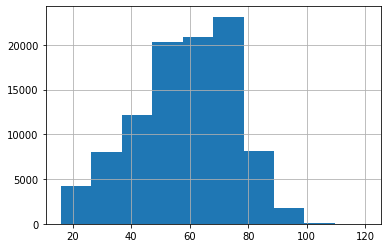

In [ ]:
dados['Idade'].hist()

## Pergunta 2: Quantas pessoas de 40 anos foram vacinadas? Quem se vacinou mais, homens ou mulheres?

In [ ]:
dados.loc[dados['Idade'] == 40]

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome
164,2021-03-23,40,M,BELO HORIZONTE,Trabalhadores de Saúde,PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CE...,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
179,2021-06-10,40,F,POCOS DE CALDAS,Comorbidades,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-AstraZeneca
197,2021-02-17,40,F,POCOS DE CALDAS,Trabalhadores de Saúde,UBS JARDIM CONTRY CLUB,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
209,2021-06-01,40,M,POCOS DE CALDAS,Comorbidades,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-AstraZeneca
302,2021-04-30,40,F,GUAXUPE,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield
...,...,...,...,...,...,...,...,...
98037,2021-05-26,40,M,POCOS DE CALDAS,Comorbidades,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
98055,2021-01-21,40,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
98075,2021-05-26,40,M,POCOS DE CALDAS,Comorbidades,SAE CTA DE POCOS DE CALDAS,1ª Dose,Vacina Covid-19 - Covishield
98275,2021-06-21,40,F,POCOS DE CALDAS,Outros,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...


In [ ]:
len(dados.loc[dados['Idade'] == 40])

991

In [ ]:
dados['Sexo'].value_counts()

F    58214
M    40452
Name: Sexo, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize=True)

F    0.590011
M    0.409989
Name: Sexo, dtype: float64

## Pergunta 3: Dentre os mais jovens, qual o motivo da aplicação da vacina?

In [ ]:
dados.loc[(dados['Idade'] < 25)]['Categoria'].value_counts()

Trabalhadores de Saúde                             1385
Outros                                              522
Comorbidades                                        485
Gestantes                                           154
Trabalhadores da Educação                           146
Pessoas com Deficiência                              84
Trabalhadores de Limpeza Urbana                      59
População Privada de Liberdade                       46
Puérperas                                            31
Faixa Etária                                         28
Trabalhadores de Transporte                          22
Pessoas em Situação de Rua                            8
Forças de Segurança e Salvamento                      3
Funcionário do Sistema de Privação de Liberdade       2
Povos e Comunidades Tradicionais                      2
Name: Categoria, dtype: int64

## Pergunta 4: Qual a porcentagem de pessoas de fora de Poços que se vacinaram na cidade?

In [ ]:
dados['Endereço Paciente'].value_counts()

POCOS DE CALDAS    91988
SAO PAULO            409
CALDAS               362
BOTELHOS             310
BANDEIRA DO SUL      263
                   ...  
PEDERNEIRAS            1
IRACEMAPOLIS           1
UMUARAMA               1
ANDRELANDIA            1
MATIAS BARBOSA         1
Name: Endereço Paciente, Length: 627, dtype: int64

In [ ]:
dados.loc[dados['Endereço Paciente'] != 'POCOS DE CALDAS']

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome
2,2021-06-18,56,F,SANTA RITA DE CALDAS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield
15,2021-02-17,56,F,CAMPESTRE,Trabalhadores de Saúde,PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CE...,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
24,2021-06-22,54,M,CAMPESTRE,Faixa Etária,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
31,2021-02-04,34,F,UBERLANDIA,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield
46,2021-05-25,36,F,NaN,Comorbidades,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
...,...,...,...,...,...,...,...,...
98612,2021-03-24,37,F,DIVINOLANDIA,Trabalhadores de Saúde,PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CE...,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
98625,2021-01-21,18,F,VARGEM GRANDE DO SUL,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
98630,2021-06-18,58,F,BANDEIRA DO SUL,Faixa Etária,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
98645,2021-07-05,50,M,SAO LUIS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield


In [ ]:
dados['Residente Poços'] = True

In [ ]:
dados.head()

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome,Residente Poços
0,2021-05-14,33,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield,True
1,2021-05-07,60,M,POCOS DE CALDAS,Faixa Etária,PSF COHAB I,1ª Dose,Vacina Covid-19 - Covishield,True
2,2021-06-18,56,F,SANTA RITA DE CALDAS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield,True
3,2021-05-04,61,M,POCOS DE CALDAS,Faixa Etária,PSF CHACARA ALVORADA,1ª Dose,Vacina Covid-19 - Covishield,True
4,2021-01-28,49,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True


In [ ]:
dados.loc[dados['Endereço Paciente'] != 'POCOS DE CALDAS', 'Residente Poços'] = False

In [ ]:
dados.head()

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome,Residente Poços
0,2021-05-14,33,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield,True
1,2021-05-07,60,M,POCOS DE CALDAS,Faixa Etária,PSF COHAB I,1ª Dose,Vacina Covid-19 - Covishield,True
2,2021-06-18,56,F,SANTA RITA DE CALDAS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield,False
3,2021-05-04,61,M,POCOS DE CALDAS,Faixa Etária,PSF CHACARA ALVORADA,1ª Dose,Vacina Covid-19 - Covishield,True
4,2021-01-28,49,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True


In [ ]:
dados['Residente Poços'].value_counts(normalize=True)

True     0.932317
False    0.067683
Name: Residente Poços, dtype: float64

## Pergunta 5: Fazem quantos dias desde o começo da campanha de vacinação?

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Aplicação      98666 non-null  object
 1   Idade               98666 non-null  int64 
 2   Sexo                98666 non-null  object
 3   Endereço Paciente   98488 non-null  object
 4   Categoria           98663 non-null  object
 5   Posto de Vacinação  98666 non-null  object
 6   Vacina Dose         98666 non-null  object
 7   Vacina Nome         98666 non-null  object
 8   Residente Poços     98666 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 6.1+ MB


In [ ]:
dados['Data Aplicação'] = pandas.to_datetime(dados['Data Aplicação'])

In [ ]:
dados['Data Aplicação'].min()

Timestamp('2021-01-20 00:00:00')

In [ ]:
dados['Data Aplicação'].max() - dados['Data Aplicação'].min()

Timedelta('173 days 00:00:00')

## Pergunta 6: Qual a idade da primeira mulher a tomar a 2º dose? Qual vacina ela tomou?

In [ ]:
dados['Vacina Dose'].value_counts()

1ª Dose    71562
2ª Dose    23983
Dose        3121
Name: Vacina Dose, dtype: int64

In [ ]:
dados.loc[(dados['Vacina Dose'] == '2ª Dose') & (dados['Sexo'] == 'F')].sort_values(by='Data Aplicação')

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome,Residente Poços
88782,2021-01-21,26,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True
39151,2021-01-21,34,F,RIO DE JANEIRO,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,False
93015,2021-01-21,45,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True
19456,2021-01-22,38,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True
4536,2021-01-22,45,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True
...,...,...,...,...,...,...,...,...,...
20059,2021-07-12,58,F,POCOS DE CALDAS,Comorbidades,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Vacina Covid-19 - Covishield,True
20083,2021-07-12,67,F,POCOS DE CALDAS,Faixa Etária,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Vacina Covid-19 - Covishield,True
17611,2021-07-12,47,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Vacina Covid-19 - Covishield,True
91910,2021-07-12,66,F,POCOS DE CALDAS,Faixa Etária,CENTRAL DE VACINA REDE DE FRIO,2ª Dose,Vacina Covid-19 - Covishield,True


## Pergunta 7: Qual a vacina mais aplicada na cidade? E nos últimos dias?

In [ ]:
dados['Vacina Nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          42077
Vacina Covid-19 - Covishield                                 37927
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     9672
Covid-19-AstraZeneca                                          5869
Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag                 3121
Name: Vacina Nome, dtype: int64

In [ ]:
dados.loc[(dados['Data Aplicação'] >= '2021-07-01')]['Vacina Nome'].value_counts()

Vacina Covid-19 - Covishield                                 4370
Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag                2477
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer    2387
Covid-19-Coronavac-Sinovac/Butantan                           763
Name: Vacina Nome, dtype: int64

## Pergunta 8: Qual o posto de vacinação mais movimentado diariamente?

In [ ]:
dados.groupby(['Posto de Vacinação']).size()

Posto de Vacinação
CENTRAL DE VACINA REDE DE FRIO                         57565
PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CENTRAL     9998
PSF CHACARA ALVORADA                                    9108
PSF COHAB I                                             7595
PSF JARDIM KENEDY I                                        2
PSF PARQUE ESPERANCA                                       1
PSF PARQUE ESPERANCA II                                 2610
SAE CTA DE POCOS DE CALDAS                               283
UBS JARDIM CONTRY CLUB                                 11504
dtype: int64

In [ ]:
dados.groupby(['Posto de Vacinação'])['Data Aplicação'].nunique()

Posto de Vacinação
CENTRAL DE VACINA REDE DE FRIO                         133
PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CENTRAL     52
PSF CHACARA ALVORADA                                    95
PSF COHAB I                                             93
PSF JARDIM KENEDY I                                      2
PSF PARQUE ESPERANCA                                     1
PSF PARQUE ESPERANCA II                                 56
SAE CTA DE POCOS DE CALDAS                              25
UBS JARDIM CONTRY CLUB                                  95
Name: Data Aplicação, dtype: int64

In [ ]:
posto_vacinados = dados.groupby(['Posto de Vacinação']).size().values

In [ ]:
posto_dias_unicos = dados.groupby(['Posto de Vacinação'])['Data Aplicação'].nunique().values

In [ ]:
posto_vacinados / posto_dias_unicos

array([432.81954887, 192.26923077,  95.87368421,  81.66666667,
         1.        ,   1.        ,  46.60714286,  11.32      ,
       121.09473684])

In [ ]:
dados.groupby(['Posto de Vacinação']).size()

Posto de Vacinação
CENTRAL DE VACINA REDE DE FRIO                         57565
PRONTO ATENDIMENTO MUNICIPAL DA POLICLINICA CENTRAL     9998
PSF CHACARA ALVORADA                                    9108
PSF COHAB I                                             7595
PSF JARDIM KENEDY I                                        2
PSF PARQUE ESPERANCA                                       1
PSF PARQUE ESPERANCA II                                 2610
SAE CTA DE POCOS DE CALDAS                               283
UBS JARDIM CONTRY CLUB                                 11504
dtype: int64

## Pergunta 9: Previsão do Fim da Vacinação

In [ ]:
dados.head()

,Data Aplicação,Idade,Sexo,Endereço Paciente,Categoria,Posto de Vacinação,Vacina Dose,Vacina Nome,Residente Poços
0,2021-05-14,33,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Vacina Covid-19 - Covishield,True
1,2021-05-07,60,M,POCOS DE CALDAS,Faixa Etária,PSF COHAB I,1ª Dose,Vacina Covid-19 - Covishield,True
2,2021-06-18,56,F,SANTA RITA DE CALDAS,Faixa Etária,UBS JARDIM CONTRY CLUB,1ª Dose,Vacina Covid-19 - Covishield,False
3,2021-05-04,61,M,POCOS DE CALDAS,Faixa Etária,PSF CHACARA ALVORADA,1ª Dose,Vacina Covid-19 - Covishield,True
4,2021-01-28,49,F,POCOS DE CALDAS,Trabalhadores de Saúde,CENTRAL DE VACINA REDE DE FRIO,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,True


In [ ]:
dados['Data Aplicação'].dt.month.value_counts().sort_index()

1     2123
2     5697
3    18884
4    24342
5    14748
6    22875
7     9997
Name: Data Aplicação, dtype: int64

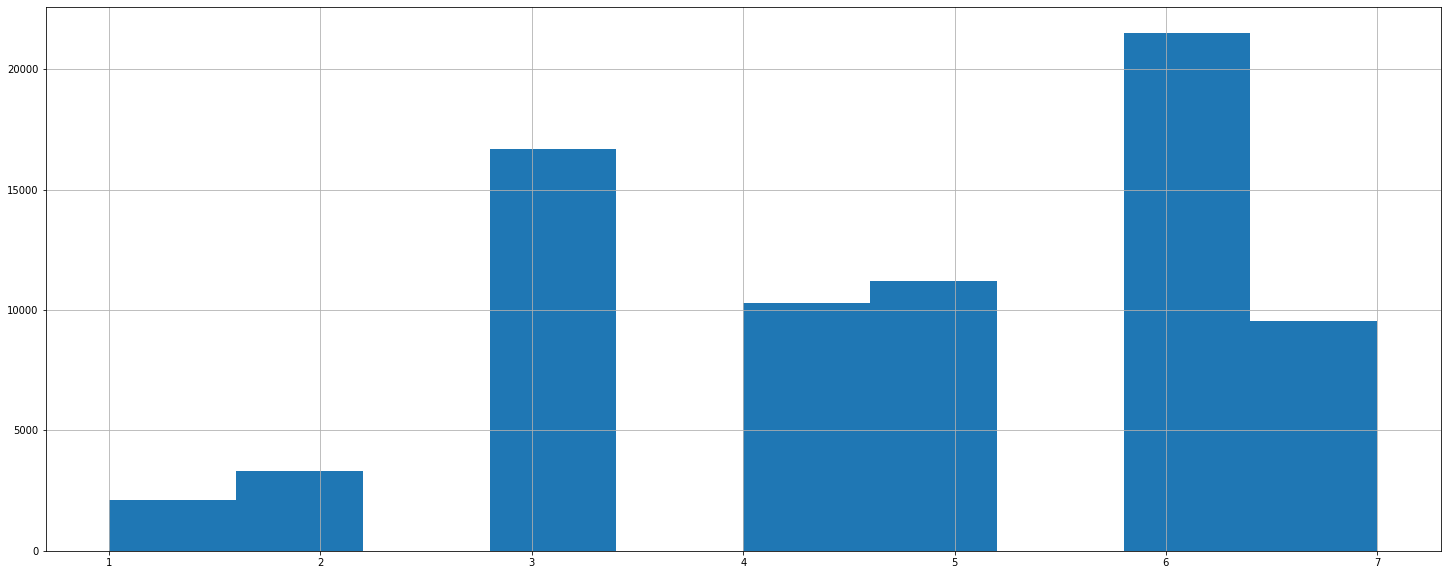

In [ ]:
dados.loc[dados['Vacina Dose'].isin(['1ª Dose', 'Dose'])]['Data Aplicação'].dt.month.hist(figsize=[25,10])

In [ ]:
qtdd_vacinados_1dose = len(dados.loc[(dados['Data Aplicação'] > '2021-06-12') 
& (dados['Vacina Dose'].isin(['1ª Dose', 'Dose']))])

qtdd_vacinados_1dose

26773

In [ ]:
qtdd_dias_1dose = dados.loc[(dados['Data Aplicação'] > '2021-06-12') 
          & (dados['Vacina Dose'].isin(['1ª Dose', 'Dose']))]['Data Aplicação'].nunique()

qtdd_dias_1dose

24

In [ ]:
meadia_dia_vacinacoes = qtdd_vacinados_1dose / qtdd_dias_1dose
meadia_dia_vacinacoes

1115.5416666666667

In [ ]:
# Dados das % da piramide Etária de Poços de Caldas de 2010

d = {'Idade': ['55 a 59 anos', '50 a 54 anos','45 a 49 anos','40 a 44 anos','35 a 39 anos','30 a 34 anos','25 a 29 anos','20 a 24 anos','15 a 19 anos','10 a 14 anos','05 a 09 anos','00 a 04 anos'],
     '% População': [0.046, 0.064, 0.068, 0.071, 0.075, 0.084, 0.088, 0.087, 0.078, 0.075, 0.063, 0.06]}
piramide_etaria_pocos = pandas.DataFrame(data=d)

In [ ]:
piramide_etaria_pocos

,Idade,% População
0,55 a 59 anos,0.046
1,50 a 54 anos,0.064
2,45 a 49 anos,0.068
3,40 a 44 anos,0.071
4,35 a 39 anos,0.075
5,30 a 34 anos,0.084
6,25 a 29 anos,0.088
7,20 a 24 anos,0.087
8,15 a 19 anos,0.078
9,10 a 14 anos,0.075


In [ ]:
#Quantidade População Poços de Caldas censo 2020
populacao_pocos_2020 = 168641

In [ ]:
#Aplicando as % de 2010 na quantidade da população de 2020, para obter a quantidade de pessoas para cada faixa de idade
piramide_etaria_pocos['Qtdd População'] = populacao_pocos_2020 * piramide_etaria_pocos['% População']

In [ ]:
piramide_etaria_pocos

,Idade,% População,Qtdd População
0,55 a 59 anos,0.046,7757.486
1,50 a 54 anos,0.064,10793.024
2,45 a 49 anos,0.068,11467.588
3,40 a 44 anos,0.071,11973.511
4,35 a 39 anos,0.075,12648.075
5,30 a 34 anos,0.084,14165.844
6,25 a 29 anos,0.088,14840.408
7,20 a 24 anos,0.087,14671.767
8,15 a 19 anos,0.078,13153.998
9,10 a 14 anos,0.075,12648.075


In [ ]:
# Na data a vacinação estava nos 44 anos
qtdd_falta_tomar = piramide_etaria_pocos[3:12]['Qtdd População'].sum()
qtdd_falta_tomar

114844.52099999998

In [ ]:
qtdd_ja_tomaram = len(dados.loc[(dados['Idade'] >= 0) & (dados['Idade'] < 44) & (dados['Vacina Dose'].isin(['1ª Dose', 'Dose']))])
qtdd_ja_tomaram

15710

In [ ]:
#Quantidade de Dias até determinada faixa

dias_faltantes = (qtdd_falta_tomar - qtdd_ja_tomaram) / meadia_dia_vacinacoes

88.86671288238148

In [ ]:
#Acrescidos fins de semana
dias_faltantes = dias_faltantes + 12

In [ ]:
import datetime


dados['Data Aplicação'].max() + datetime.timedelta(days=dias_faltantes)

Timestamp('2021-10-25 00:00:00')

In [ ]:
# 39 a 35 anos - 30/07 (Encerraria 35 anos)
# 34 a 30 anos - 10/08 (Encerraria 30 anos)
# 29 a 25 anos - 23/08 (Encerraria 25 anos)
# 24 a 20 anos - 05/09 (Encerraria 20 anos)
# 19 a 15 anos - 17/09 (Encerraria 15 anos)
# 14 a 00 anos - 25/10 (Encerraria Todos)